In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal',
          {'theme': 'serif',
           'transition': 'slide',
           'start_slideshow_at': 'selected',
           'width': 1024,
           'height': 768});

# A tour of the ~~Scientific~~ ~~Oceanographic~~ Geosciences Python stack

![](./images/pork-knee.jpg)

### Before we begin

- Who am I?
- Who are you?
- What do you expect from this tutorial?

How to run this notebook


```bash
url=http://bit.ly/miniconda

wget $url -O miniconda.sh
bash miniconda.sh -b
export PATH=$HOME/miniconda/bin:$PATH
conda update --yes --all
```

```bash
url=http://bit.ly/conda-env

wget $url -O environment.yml
conda env create environment.yml
```

# NumPy

http://www.numpy.org/

See also:

- http://www.labri.fr/perso/nrougier/teaching/numpy.100/

Define an array

In [2]:
import numpy as np
a = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.complex)

print('Data type            : {}'.format(a.dtype))
print('Element size         : {}'.format(a.size))
print('Number of dimensions : {}'.format(a.ndim))
print('Shape                : {}'.format(a.shape))
print('Memory in bytes      : {}'.format(a.nbytes))

Data type            : complex128
Element size         : 6
Number of dimensions : 2
Shape                : (2, 3)
Memory in bytes      : 96


In [3]:
np.arange(0, 2*np.pi, np.pi)

array([ 0.        ,  3.14159265])

In [4]:
np.linspace(0, 2*np.pi, 5)

array([ 0.        ,  1.57079633,  3.14159265,  4.71238898,  6.28318531])

In [5]:
np.zeros_like(a) == np.zeros(a.shape)

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

Reading some data

In [6]:
!head -n 5 ./data/dados_pirata.csv

,datahora,t_1,t_10,t_100,t_120,t_13,t_140,t_180,t_20,t_300,t_40,t_5,t_500,t_60,t_80
0,2005-08-24 12:00:00+00:00,25.19,-99999.0,25.2,24.89,-99999.0,23.79,20.6,25.17,12.46,25.17,-99999.0,6.82,25.19,25.19
1,2005-08-25 12:00:00+00:00,25.19,-99999.0,25.17,24.72,-99999.0,23.61,20.31,25.18,12.27,25.18,-99999.0,6.85,25.21,25.18
2,2005-08-26 12:00:00+00:00,25.26,-99999.0,25.13,24.74,-99999.0,23.63,20.43,25.24,12.36,25.22,-99999.0,6.87,25.2,25.16
3,2005-08-27 12:00:00+00:00,25.23,-99999.0,25.04,24.77,-99999.0,23.74,20.1,25.19,12.23,25.19,-99999.0,6.86,25.14,25.08


We need to skip the header and the date-time columns

In [7]:
data = np.loadtxt("./data/dados_pirata.csv",
                  skiprows=1,
                  usecols=range(2, 16),
                  delimiter=',')

data[data == -99999.] = np.NaN

data.shape, data.dtype

((3653, 14), dtype('float64'))

But the depth information was in header!

We need to type that in...

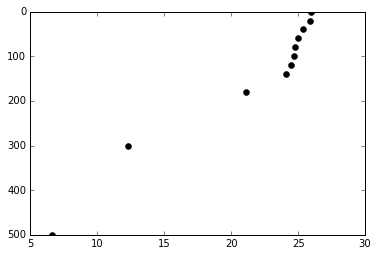

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

z = [1, 10, 100, 120, 13, 140, 180, 20,
     300, 40,5, 500, 60, 80]

fig, ax = plt.subplots()

ax.plot(data[42, :], z, 'ko') # Plot . because z was not ordered.
ax.invert_yaxis()

```python
import *
```

vs

```python
import numpy as np
```

In [9]:
sum(range(5), -1)

9

In [10]:
from numpy import *
sum(range(5), -1)

10

## Exercise

Load `dados_pirata.csv` again, but now use numpy masked arrays to remove the bad values.

In [11]:
import numpy as np
import numpy.ma as ma

data = np.loadtxt("./data/dados_pirata.csv",
                  skiprows=1,
                  usecols=range(2, 16),
                  delimiter=',')

data[data == -99999.] = np.NaN

ma.masked_invalid(data)

masked_array(data =
 [[25.19 -- 25.2 ..., 6.82 25.19 25.19]
 [25.19 -- 25.17 ..., 6.85 25.21 25.18]
 [25.26 -- 25.13 ..., 6.87 25.2 25.16]
 ..., 
 [25.7 -- 25.45 ..., 7.01 25.48 25.45]
 [25.63 -- 25.43 ..., 7.04 25.45 25.43]
 [25.59 -- 25.43 ..., 7.04 25.46 25.43]],
             mask =
 [[False  True False ..., False False False]
 [False  True False ..., False False False]
 [False  True False ..., False False False]
 ..., 
 [False  True False ..., False False False]
 [False  True False ..., False False False]
 [False  True False ..., False False False]],
       fill_value = 1e+20)

## How to remember the methods, syntaxes, etc?

![](./images/tar.png)

http://mathesaurus.sourceforge.net/matlab-numpy.html

# Pandas: can we do better than NumPy arrays?

http://pandas.pydata.org/

Note that almost everything we did before, and some more, is now done at the loading time

In [12]:
import pandas as pd

df = pd.read_csv('./data/dados_pirata.csv',
                 index_col='datahora',
                 parse_dates=True,
                 na_values=-99999)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns = ['{0:0>3}'.format(col.split('_')[1]) for
              col in df.columns]
df.sort_index(axis=1, inplace=True)

In [13]:
df.head(5)

,001,005,010,013,020,040,060,080,100,120,140,180,300,500
datahora,,,,,,,,,,,,,,
2005-08-24 12:00:00,25.19,NaN,NaN,NaN,25.17,25.17,25.19,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00,25.19,NaN,NaN,NaN,25.18,25.18,25.21,25.18,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00,25.26,NaN,NaN,NaN,25.24,25.22,25.20,25.16,25.13,24.74,23.63,20.43,12.36,6.87
2005-08-27 12:00:00,25.23,NaN,NaN,NaN,25.19,25.19,25.14,25.08,25.04,24.77,23.74,20.10,12.23,6.86
2005-08-28 12:00:00,25.25,NaN,NaN,NaN,25.21,25.11,25.04,24.99,24.90,24.78,23.81,20.21,12.48,6.79


Pandas behave like masked-arrays,
but with some extra convenience functions beyond `nan{min,max,mean,etc}`

In [14]:
df.dropna(how='all', axis=1, inplace=True)

df.head(3)

,001,020,040,060,080,100,120,140,180,300,500
datahora,,,,,,,,,,,
2005-08-24 12:00:00,25.19,25.17,25.17,25.19,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00,25.19,25.18,25.18,25.21,25.18,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00,25.26,25.24,25.22,25.20,25.16,25.13,24.74,23.63,20.43,12.36,6.87


Quick way to explore the data

In [15]:
desc = df.describe()
desc

/home/filipe/miniconda/envs/scipyla_2016/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,001,020,040,060,080,100,120,140,180,300,500
count,3206.000000,2949.000000,3408.000000,3408.000000,3161.000000,3407.000000,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000
mean,26.903054,26.856673,26.746086,26.283706,25.486109,24.681382,23.947416,23.076496,20.080417,12.359806,6.675656
std,1.030174,0.999788,0.992836,0.840345,0.523529,0.500878,0.607452,0.755077,1.081181,0.461918,0.266193
min,24.710000,24.820000,24.630000,24.550000,23.950000,22.850000,21.450000,20.110000,17.210000,10.930000,5.620000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,29.090000,28.840000,28.790000,28.580000,27.080000,26.450000,25.580000,25.180000,23.210000,13.630000,7.790000


![](./images/read_the_docs_until_the_end.jpg)

```
RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
```

High level code!  No need for comments to describe what is being computed below:

In [16]:
desc.ix['std'] ** 2

001    1.061258
020    0.999577
040    0.985722
060    0.706179
080    0.274083
100    0.250879
120    0.368998
140    0.570141
180    1.168953
300    0.213368
500    0.070859
Name: std, dtype: float64

What levels are we plotting?

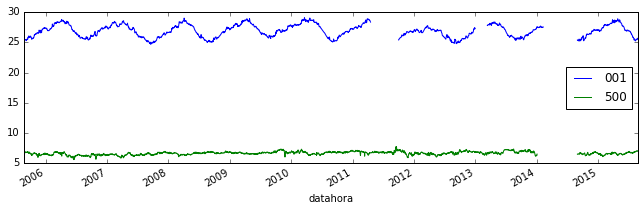

In [17]:
ax = df[['001', '500']].plot(figsize=(11, 3))

More convenience functions:
- interpolate

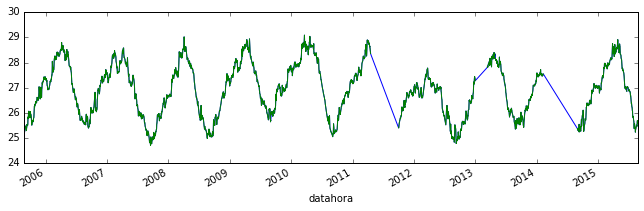

In [18]:
df['001'].interpolate().plot(figsize=(11, 3))
ax = df['001'].plot()

Full control of the interpolation

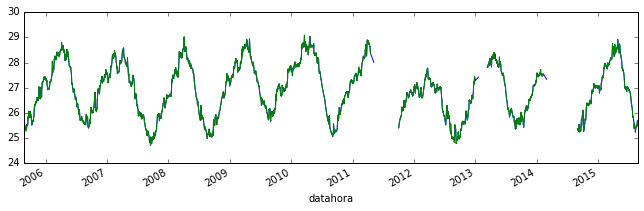

In [19]:
kw = dict(method='time', limit=20)
df['001'].interpolate(**kw).plot(figsize=(11, 3))
ax = df['001'].plot()

Pandas loves time-series

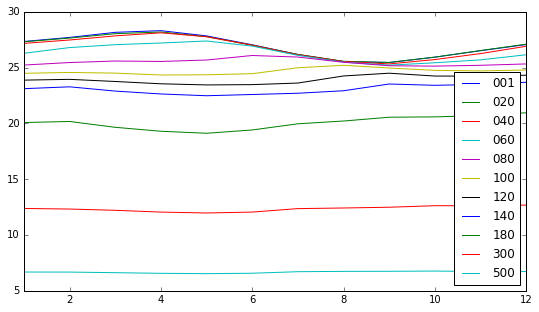

In [20]:
key = lambda x: x.month

grouped = df.groupby(key)

monthly = grouped.mean()

fig, ax = plt.subplots(figsize=(9, 5))

ax = monthly.plot(ax=ax)

## Exercise

Load the file `15t30717.3f1` and filter the tidal signal.

In [21]:
from datetime import datetime
from pandas import read_table

cols = ['j', 'u', 'v', 'temp', 'sal', 'y', 'mn', 'd', 'h', 'mi']

df = read_table('./data/15t30717.3f1' , delim_whitespace=True, names=cols)
dates = [datetime(*x) for x in
         zip(df['y'], df['mn'], df['d'], df['h'], df['mi'])]
df.index = dates
df.drop(['y', 'mn', 'd', 'h', 'mi', 'j'], axis=1, inplace=True)
df.head()

,u,v,temp,sal
1993-07-18 03:00:00,11.7,-1.3,28.3,29.2
1993-07-18 04:00:00,12.3,-4.5,28.1,29.4
1993-07-18 05:00:00,9.6,-5.3,27.6,31.0
1993-07-18 06:00:00,7.6,-2.3,27.2,32.4
1993-07-18 07:00:00,10.6,-2.0,27.2,32.5


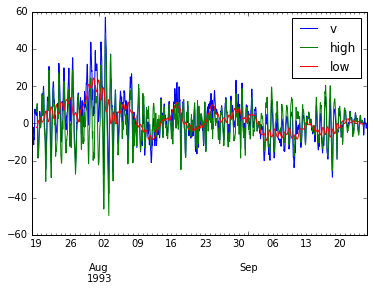

In [22]:
from pandas import rolling_mean

df = df.resample(rule='1H').mean()

df['low'] = df['v'].rolling(window=40, center=True).mean()
df['high'] = df['v'] - df['low']
df[['v', 'high', 'low']].plot()

## Pandas has a few siblings:

- geopandas
- ctd
- xray

GeoPandas read GeoJSONs, Shapefiles, etc as pandas DataFrames

http://geopandas.org/

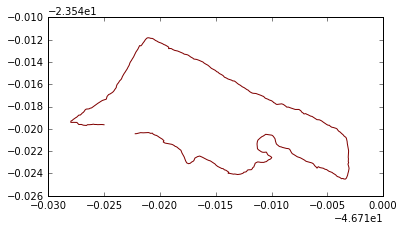

In [23]:
import geopandas as gpd

fname = "./data/2013-04-29-Running.geojson"

df = gpd.read_file(fname)
ax = df.plot()

The geometries are essentially shapely objects

In [24]:
shape = df['geometry'][0]

msg = """
Length is {} km.

The center is locate at {!r}.

The track bounds are {}.
""".format
print(msg(shape.length * 111, shape.centroid.xy,
          shape.bounds))


Length is 7.2781139639 km.

The center is locate at (array('d', [-46.724456529983655]), array('d', [-23.55928803359001])).

The track bounds are (-46.73799172975123, -23.564499272033572, -46.71305129304528, -23.551835222169757).



[ptyhon-ctd](https://pypi.python.org/pypi/ctd) loads `ctd`, `xbt`, and many more ocean profilers directly into pandas

In [25]:
from ctd import DataFrame
cast = DataFrame.from_cnv('./data/CTD_001.cnv.gz',
                          compression='gzip')
cast.head()

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,longitude,pumps,pla,sbeox0PS,sbeox0Mm/Kg,dz/dtM,accM,flSP,xmiss,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
2.810,1.0,0.000,24.2158,24.2132,5.527058,5.526362,2.8107,1.000000e-12,11.761,-2.332,...,-47.452167,True,24.221,71.49588,147.595,0.000,0.00,0.11111,96.8657,False
2.846,2.0,0.042,24.2158,24.2132,5.527065,5.526352,2.8120,1.000000e-12,13.721,-2.336,...,-47.452167,True,24.221,71.53789,147.682,0.878,21.08,0.10867,96.8657,False
2.810,3.0,0.083,24.2156,24.2131,5.527060,5.526333,2.8120,1.000000e-12,11.761,-2.336,...,-47.452167,True,24.221,71.53759,147.682,-0.878,-42.16,0.10623,96.8657,False
2.744,4.0,0.125,24.2156,24.2132,5.527091,5.526339,2.8120,1.000000e-12,13.721,-2.336,...,-47.452167,True,24.221,71.53702,147.680,-1.581,-16.87,0.10745,96.8657,False
2.707,5.0,0.167,24.2158,24.2134,5.527052,5.526343,2.8132,1.000000e-12,13.721,-2.332,...,-47.452167,True,24.221,71.57837,147.766,-0.878,16.87,0.11111,96.9189,False


The augmented DataFrame has some extra methods to process CTD data

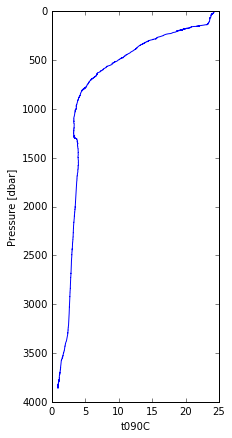

In [26]:
downcast, upcast = cast['t090C'].split()
fig, ax = downcast.plot(figsize=(3, 7))

[xray](http://xray.readthedocs.org/en/stable/): `netCDF4` + `pandas` for >2D tables

In [27]:
import xray

url = ('http://geoport.whoi.edu/thredds/dodsC/clay/usgs/'
       'users/jcwarner/Projects/Sandy/triple_nest/'
       '00_dir_NYB05.ncml') # './data/00_dir_NYB05.nc'

ds = xray.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:                 (NST: 6, Nbed: 1, eta_psi: 106, eta_rho: 107, eta_u: 107, eta_v: 106, ocean_time: 201, s_rho: 16, s_w: 17, tracer: 8, xi_psi: 344, xi_rho: 345, xi_u: 344, xi_v: 345)
Coordinates:
  * s_rho                   (s_rho) float64 -0.9688 -0.9062 -0.8438 -0.7812 ...
  * s_w                     (s_w) float64 -1.0 -0.9375 -0.875 -0.8125 -0.75 ...
    lon_rho                 (eta_rho, xi_rho) float64 ...
    lat_rho                 (eta_rho, xi_rho) float64 ...
    lon_u                   (eta_u, xi_u) float64 ...
    lat_u                   (eta_u, xi_u) float64 ...
    lon_v                   (eta_v, xi_v) float64 ...
    lat_v                   (eta_v, xi_v) float64 ...
    lon_psi                 (eta_psi, xi_psi) float64 ...
    lat_psi                 (eta_psi, xi_psi) float64 ...
  * ocean_time              (ocean_time) datetime64[ns] 2012-10-25 ...
  * NST                     (NST) int64 0 1 2 3 4 5
  * Nbed                    (Nbed) int64 0
  

Slice the variables using the `var name` (like `netCDF4`)

In [28]:
temp = ds['temp']
temp

<xarray.DataArray 'temp' (ocean_time: 201, s_rho: 16, eta_rho: 107, xi_rho: 345)>
[118718640 values with dtype=float64]
Coordinates:
  * s_rho       (s_rho) float64 -0.9688 -0.9062 -0.8438 -0.7812 -0.7188 ...
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 2012-10-25 2012-10-25T01:00:00 ...
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    long_name: potential temperature
    units: Celsius
    time: ocean_time
    field: temperature, scalar, series
    standard_name: sea_water_potential_temperature
    grid: grid
    content_coverage_type: modelResult
    location: face

Use high-level dates slice (like pandas)

In [29]:
temp.sel(ocean_time='2012-10-25')

<xarray.DataArray 'temp' (ocean_time: 24, s_rho: 16, eta_rho: 107, xi_rho: 345)>
[14175360 values with dtype=float64]
Coordinates:
  * s_rho       (s_rho) float64 -0.9688 -0.9062 -0.8438 -0.7812 -0.7188 ...
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 2012-10-25 2012-10-25T01:00:00 ...
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
Attributes:
    long_name: potential temperature
    units: Celsius
    time: ocean_time
    field: temperature, scalar, series
    standard_name: sea_water_potential_temperature
    grid: grid
    content_coverage_type: modelResult
    location: face

You can even slice using integers and named the axis

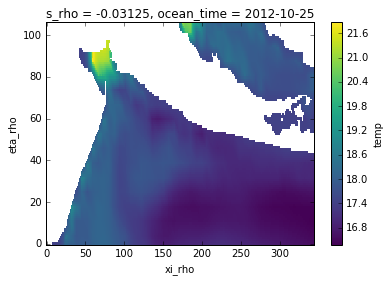

In [30]:
t = temp.isel(s_rho=-1, ocean_time=0)

cs = t.plot()

# seaborn and statsmodels: Easy stats at you finger tips

https://stanford.edu/~mwaskom/software/seaborn/

http://statsmodels.sourceforge.net/

In [31]:
import seaborn

from pandas import read_csv

kw = dict(na_values='NaN', sep=',', encoding='utf-8',
          skipinitialspace=True, index_col=False)

df = read_csv("./data/fish.csv", **kw)
df.head()

,Days,ID,Recovery,Extract weight,Lipid %,Weight (g),Size (cm),Liver weight (g),LSI,CF,BDE 47 (ng/g),BDE 99 (ng/g)
0,0,A,73.21,0.10,3.600000,20.09,12.8,0.14,0.696864,0.957966,0.0,0.0
1,0,B,98.24,0.22,2.272727,36.52,15.5,0.33,0.903614,0.980699,0.0,0.0
2,0,C,89.71,0.18,3.500000,28.74,14.7,0.25,0.869868,0.904763,0.0,0.0
3,1,A,78.40,0.13,1.330769,23.70,14.0,0.15,0.632911,0.863703,0.0,0.0
4,1,B,66.24,0.13,2.838462,32.80,15.0,0.20,0.609756,0.971852,0.0,0.0


![](./images/educated_guess.jpg)

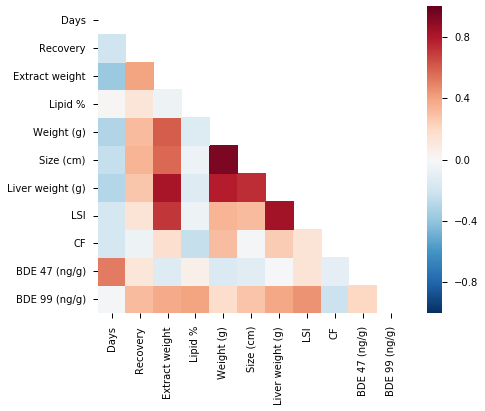

In [32]:
kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = seaborn.heatmap(corr, mask=mask, square=True)

In [33]:
import statsmodels.api as sm

results = sm.OLS(df['BDE 47 (ng/g)'], df['Days']).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          BDE 47 (ng/g)   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     46.64
Date:                Sat, 14 May 2016   Prob (F-statistic):           3.24e-08
Time:                        14:43:03   Log-Likelihood:                -269.93
No. Observations:                  41   AIC:                             541.9
Df Residuals:                      40   BIC:                             543.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Days           5.4980      0.805      6.830      0.0

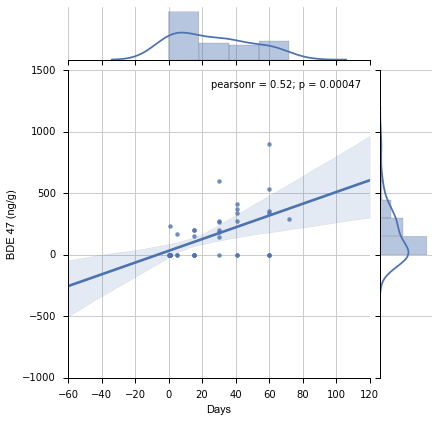

In [34]:
ax = seaborn.jointplot("Days", "BDE 47 (ng/g)", df, kind="reg")

# dask: execute"bigger than memory" operations

http://dask.pydata.org/en/latest/

https://jakevdp.github.io/blog/2015/08/14/out-of-core-dataframes-in-python/

![](./images/dask_is_smart.jpg)

In [35]:
import dask
from dask.async import get_sync
dask.set_options(get=get_sync);

The following lines do not download the data

In [36]:
from netCDF4 import Dataset

nc = Dataset(url)

t = nc['temp']
s = nc['salt']

t.shape, s.shape

((201, 16, 107, 345), (201, 16, 107, 345))

By making the netCDF4 variable a dask variable we can start computing stuff without loading the data!
Note

In [37]:
import dask.array as da

chunks = (1, 16, 107, 345)

t = da.from_array(t, chunks=chunks)
s = da.from_array(s, chunks=chunks)

t

dask.array<from-ar..., shape=(201, 16, 107, 345), dtype=float32, chunksize=(1, 16, 107, 345)>

Note that the result is a dask element wise object

In [38]:
(s + t) * 2

dask.array<elemwis..., shape=(201, 16, 107, 345), dtype=float32, chunksize=(1, 16, 107, 345)>

You need to manually trigger the computations to load the data.
Note that some operations, like plotting, will load the data automatically:

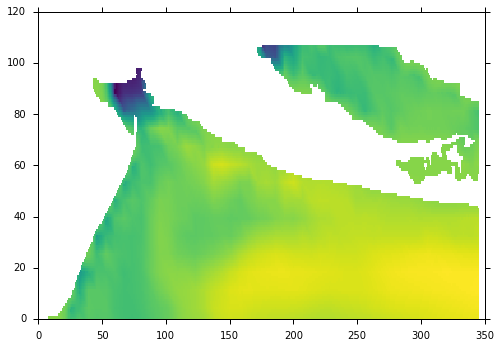

In [39]:
import gsw
import seawater as sw
import numpy.ma as ma

S = s[0, -1, :, :]
T = t[0, -1, :, :]

sigma0 = gsw.sigma0(S.compute(), T.compute())
cs = plt.pcolormesh(ma.masked_equal(sigma0, -1000), cmap=plt.cm.viridis)

# cartopy: maps!

http://scitools.org.uk/cartopy/

The first python library to actually solve the dateline problem

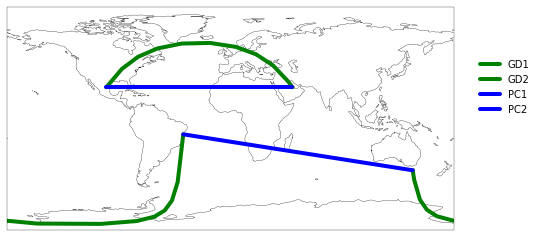

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(); ax.set_global()

kw = dict(lw=4, color='g', transform=ccrs.Geodetic())
l0 = plt.plot([-100, 50], [25, 25], label='GD1', **kw)
l1 = plt.plot([-38, 147], [-13, -42], label='GD2', **kw)

kw = dict(linewidth=4, color='b', transform=projection)
l2 = plt.plot([-100, 50], [25, 25], label='PC1', **kw)
l3 = plt.plot([-38, 147], [-13, -42], label='PC2', **kw)

leg = ax.legend(loc=(1.05, 0.5))

When creating a lot of maps it is convenient to wrap them in a plotting function

In [41]:
from oceans import cm
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import (LONGITUDE_FORMATTER,
                                   LATITUDE_FORMATTER)

def make_map(projection=ccrs.PlateCarree()):
    subplot_kw = dict(projection=projection)
    fig, ax = plt.subplots(figsize=(9, 13),
                           subplot_kw=subplot_kw)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

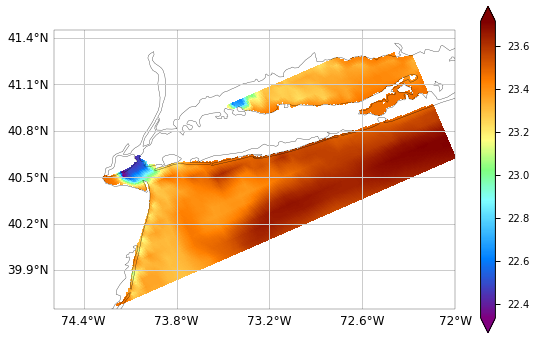

In [42]:
lon = nc['lon_rho'][:]
lat = nc['lat_rho'][:]

fig, ax = make_map()
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()])
ax.coastlines('10m')
s0 = ma.masked_equal(sigma0, -1000)
cs = ax.pcolormesh(lon, lat, s0, cmap=cm.avhrr)
cbar = fig.colorbar(cs, shrink=0.45, extend='both')

# iris

http://scitools.org.uk/iris/docs/latest/index.html

Iris is an interpretation of the [CF-Conventions](http://cfconventions.org/).
The main object is the `cube`:

In [43]:
import iris

cubes = iris.load_raw(url)
print(cubes)

/home/filipe/miniconda/envs/scipyla_2016/lib/python2.7/site-packages/iris/fileformats/cf.py:1058: UserWarning: Ignoring formula terms variable u'h' referenced by data variable u'v_stokes' via variable u's_rho': Dimensions (u'eta_rho', u'xi_rho') do not span (u'ocean_time', u's_rho', u'eta_v', u'xi_v')
  warnings.warn(msg)
/home/filipe/miniconda/envs/scipyla_2016/lib/python2.7/site-packages/iris/fileformats/cf.py:1058: UserWarning: Ignoring formula terms variable u'zeta' referenced by data variable u'v_stokes' via variable u's_rho': Dimensions (u'ocean_time', u'eta_rho', u'xi_rho') do not span (u'ocean_time', u's_rho', u'eta_v', u'xi_v')
  warnings.warn(msg)
/home/filipe/miniconda/envs/scipyla_2016/lib/python2.7/site-packages/iris/fileformats/cf.py:1058: UserWarning: Ignoring formula terms variable u'h' referenced by data variable u'u_stokes' via variable u's_rho': Dimensions (u'eta_rho', u'xi_rho') do not span (u'ocean_time', u's_rho', u'eta_u', u'xi_u')
  warnings.warn(msg)
/home/fili

0: sediment concentration used in uniform initial conditions / (kilogram meter-3) (-- : 6)
1: sediment surface layer erosing rate / (kilogram meter-2 second-1) (-- : 6)
2: maximum wind and current, bottom v-wave stress / (newton meter-2) (time: 201; -- : 107; -- : 345)
3: erosion or deposition / (meter)     (time: 201; -- : 107; -- : 345)
4: sediment critical shear for deposition / (Newton meter-2) (-- : 6)
5: sediment critical shear for erosion / (Newton meter-2) (-- : 6)
6: v-Stokes drift velocity / (meter second-1) (time: 201; ocean_s_coordinate_g1: 16; -- : 106; -- : 345)
7: sediment median grain density / (kilogram meter3) (time: 201; -- : 107; -- : 345)
8: current-induced, bottom v-momentum stress / (newton meter-2) (time: 201; -- : 107; -- : 345)
9: wind-induced, bottom v-momentum stress / (newton meter-2) (time: 201; -- : 107; -- : 345)
10: sea_surface_wave_significant_height / (meter) (time: 201; -- : 107; -- : 345)
11: bed load flux of sand in V-direction, size class 03 / (ki

We can take advantage of the CF conventions to access variables by its `standard_name`

In [44]:
temp = cubes.extract_strict('sea_water_potential_temperature')
print(temp)

sea_water_potential_temperature               (time: 201; ocean_s_coordinate_g1: 16; -- : 107; -- : 345)
     Dimension coordinates:
          time                                             x                           -        -         -
          ocean_s_coordinate_g1                            -                           x        -         -
     Auxiliary coordinates:
          free-surface                                     x                           -        x         x
          S-coordinate stretching curves at RHO-points     -                           x        -         -
          bathymetry at RHO-points                         -                           -        x         x
          latitude                                         -                           -        x         x
          longitude                                        -                           -        x         x
     Derived coordinates:
          sea_surface_height_above_reference_ellipsoid   

Like `xray` we have both high and low level slicing
(Although the high level slicing in `iris` is too sophisticated for my taste ;-)

In [45]:
t = temp[-1, -1, ...]

print(t)  # The metadata is always propagated.

sea_water_potential_temperature             (-- : 107; -- : 345)
     Auxiliary coordinates:
          bathymetry at RHO-points                         x         x
          free-surface                                     x         x
          latitude                                         x         x
          longitude                                        x         x
     Derived coordinates:
          sea_surface_height_above_reference_ellipsoid     x         x
     Scalar coordinates:
          S-coordinate parameter, critical depth: 2.0 meter
          S-coordinate stretching curves at RHO-points: -0.00225488671278
          ocean_s_coordinate_g1: -0.03125
          time: 2012-11-02 08:00:00.000006
     Attributes:
          CPP_options: FIREISLAND, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOBC, ANA_M2OBC, ANA_NUDGCOEF,...
          Conventions: CF-1.6, SGRID-0.1, ACDD-1.3
          NLM_LBC: 
EDGE:         WEST   SOUTH  EAST   NORTH  
zeta:         Nes    Nes  ...
          a

There are even some quick plotting routines to explore the data.
Note the free colorbar, units label, and title:

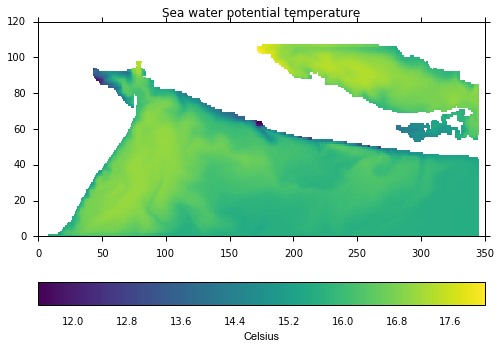

In [46]:
import iris.quickplot as qplt

cs = qplt.pcolormesh(t, cmap=plt.cm.viridis)

# Optimizing code for iso-surfaces using Fortran, Cython, and Numba

In [47]:
p = np.linspace(-100, 0, 30)[:, None, None] * np.ones((50, 70))
x, y = np.mgrid[0:20:50j, 0:20:70j]

q = np.sin(x) + p
p0 = -50.

In [48]:
def naive_zslice(q, p, p0, mask_val=np.NaN):
    N, M, L = q.shape[0], q.shape[1], q.shape[2]
    
    q_iso = np.empty((M, L))
    for i in range(L):
        for j in range(M):
            q_iso[j, i] = mask_val
            for k in range(N-1):
                if (((p[k, j, i] < p0) and (p[k+1, j, i] > p0)) or
                    ((p[k, j, i] > p0) and (p[k+1, j, i] < p0))):
                    dp = p[k+1, j, i] - p[k, j, i]
                    dp0 = p0 - p[k, j, i]
                    dq = q[k+1, j, i] - q[k, j, i]
                    q_iso[j, i] = q[k, j, i] + dq*dp0/dp
    return q_iso

naive = %timeit -n1000 -o naive_zslice(q, p, p0)

1000 loops, best of 3: 59.4 ms per loop


In [49]:
def numpy_zslice(q, p, p0):
    N, L, M = q.shape
    p0 = -abs(p0)
    data = q.reshape(N, -1, order='F')
    z = p.reshape(N, -1, order='F')

    bottom = np.zeros((1, L*M))
    top = np.empty_like(bottom)
    top.fill(-np.inf)
    z = np.r_[top, z, bottom]

    top.fill(np.NaN)
    data = np.r_[top, data, data[-1, ...][None, :]]
    z, data = map(np.flipud, (z, data))
    zg_ind = np.diff(z < p0, axis=0).ravel('F').nonzero()[0]
    zg_ind += np.arange(0, len(zg_ind), 1)
    depth_greater_z = z.ravel('F')[zg_ind]
    data_greater_z = data.ravel('F')[zg_ind]

    zl_ind = np.diff(z > p0, axis=0).ravel('F').nonzero()[0]
    zl_ind += np.arange(1, len(zg_ind)+1, 1)
    depth_lesser_z = z.ravel('F')[zl_ind]
    data_lesser_z = data.ravel('F')[zl_ind]

    alpha = (p0-depth_greater_z) / (depth_lesser_z-depth_greater_z)
    data_at_depth = (data_lesser_z*alpha) + (data_greater_z*(1-alpha))
    return data_at_depth.reshape(L, M, order='F')

In [50]:
numpy = %timeit -n1000 -o numpy_zslice(q, p, p0)

1000 loops, best of 3: 1.66 ms per loop


## Let's bring the loop back!

![](./images/idiosyncratic.jpg)

In [51]:
%load_ext fortranmagic

/home/filipe/miniconda/envs/scipyla_2016/lib/python2.7/site-packages/IPython/utils/path.py:264: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module
  warn("get_ipython_cache_dir has moved to the IPython.paths module")


In [52]:
%%fortran
      subroutine fortran_zslice(q, p, p0, q_iso, L, M, N)
      implicit none
      integer L, M, N
      real*8 q(N,M,L)
      real*8 p(N,M,L)
      real*8 q_iso(M,L)
cf2py intent(out) q_iso
      integer i, j, k
      real*8 dq, dp, dp0, p0

      do i=1,L
        do j=1,M
          q_iso(j,i)=1.0d20 ! default value - isoline not in profile
          do k=1,N-1
            if ( (p(k,j,i).lt.p0.and.p(k+1,j,i).gt.p0).or.
     &           (p(k,j,i).gt.p0.and.p(k+1,j,i).lt.p0) ) then
              dp = p(k+1,j,i) - p(k,j,i)
              dp0 = p0 - p(k,j,i)
              dq = q(k+1,j,i) - q(k,j,i)
              q_iso(j,i) = q(k,j,i) + dq*dp0/dp
            endif
          enddo
        enddo
      enddo

      return
      end subroutine fortran_zslice

In [53]:
fotran = %timeit -n1000 -o fortran_zslice(q, p, p0)

1000 loops, best of 3: 391 µs per loop


In [54]:
%load_ext Cython

In [55]:
%%cython
cimport cython
import numpy as np
cimport numpy as np

@cython.boundscheck(False)
@cython.wraparound(False)
def cython_zslice(double[:, :, ::1] q,
                    double[:, :, ::1] p,
                    double p0,
                    mask_val=np.NaN):
    cdef int L = q.shape[2]
    cdef int M = q.shape[1]
    cdef int N = q.shape[0]
    cdef double dp, dq, dq0
    cdef int i, j, k
    
    cdef double[:, ::1] q_iso = np.empty((M, L), dtype=np.float64)
    
    for i in range(L):
        for j in range(M):
            q_iso[j, i] = mask_val
            for k in range(N-1):
                if (((p[k, j, i] < p0) and (p[k+1, j, i] > p0)) or
                    ((p[k, j, i] > p0) and (p[k+1, j, i] < p0))):
                    dp = p[k+1, j, i] - p[k, j, i]
                    dp0 = p0 - p[k, j, i]
                    dq = q[k+1, j, i] - q[k, j, i]
                    q_iso[j, i] = q[k, j, i] + dq*dp0/dp
    return np.array(q_iso)

In [56]:
cython = %timeit -n1000 -o cython_zslice(q, p, p0)

1000 loops, best of 3: 473 µs per loop


In [57]:
from numba.decorators import jit

@jit
def numba_zslice(q, p, p0, mask_val=np.NaN):
    N, M, L = q.shape[0], q.shape[1], q.shape[2]
    
    q_iso = np.empty((M, L))
    for i in range(L):
        for j in range(M):
            q_iso[j, i] = mask_val
            for k in range(N-1):
                if (((p[k, j, i] < p0) and (p[k+1, j, i] > p0)) or
                    ((p[k, j, i] > p0) and (p[k+1, j, i] < p0))):
                    dp = p[k+1, j, i] - p[k, j, i]
                    dp0 = p0 - p[k, j, i]
                    dq = q[k+1, j, i] - q[k, j, i]
                    q_iso[j, i] = q[k, j, i] + dq*dp0/dp
    return q_iso

In [58]:
numba = %timeit -n1000 -o numba_zslice(q, p, p0)

1000 loops, best of 3: 235 µs per loop


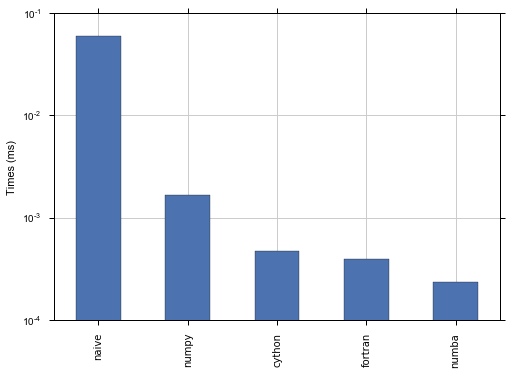

In [59]:
from pandas import DataFrame

benchmarkings = dict(naive=naive.best,
                     numpy=numpy.best,
                     fortran=fotran.best,
                     cython=cython.best,
                     numba=numba.best)

benchmarkings = DataFrame.from_dict(benchmarkings, orient='index')
benchmarkings.sort_values(by=0, ascending=False, inplace=True)
ax = benchmarkings.plot(kind='bar', logy=True, legend=False)
yt = ax.set_ylabel('Times (ms)')

## How to decide which one use?

![](./images/good_code.png)

# Some very "oceanographic" libraries


- [odvc](https://raw.githubusercontent.com/ioos/odvc/master/notebooks/ocean_sigma_coordinate-FVCOM.ipynb)
- [pyoos](http://ioos.github.io/system-test/)
- [pyugrid](https://ocefpaf.github.io/python4oceanographers/blog/2015/07/20/pyugrid/)
- [pysgrid](http://nbviewer.ipython.org/urls/raw.githubusercontent.com/sgrid/pysgrid/master/pysgrid/notebook_examples/hudson_shelf_valley.ipynb)
- [ciso](http://nbviewer.ipython.org/gist/ocefpaf/ee14af5220bc3512131f)
- [utide](https://ocefpaf.github.io/python4oceanographers/blog/2015/05/18/utide_ellipse/)

# Using python as a glue language

## MatLab

![](./images/626.gif)

In [60]:
try:
    %load_ext oct2py.ipython
    octave = True
except OSError as e:
    octave = False
    print(e)
    print("You cannot run the next 2 cells with the octave example :-(")

In [61]:
%%file fahr_to_kelvin.m

function ktemp = fahr_to_kelvin(ftemp)
    ktemp = ((ftemp - 32) * (5/9)) + 273.15;
end

Overwriting fahr_to_kelvin.m


In [62]:
if octave:
    %octave fahr_to_kelvin(32)

ans =  273.15

## Fortran

![](./images/Olde_Fortran_Malt_Liquor.jpg)

In [63]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [64]:
%%fortran

subroutine calc_sin(x, y)
    real, intent(in) :: x
    real, intent(out) :: y

    y = sin(x)

end subroutine calc_sin

In [65]:
calc_sin(np.pi/2)

1.0

## R

![](./images/r_curve.jpg)

In [66]:
%load_ext rpy2.ipython

In [67]:
%%R
X=c(1,4,5,7)
Y = c(2,4,3,9)
print(summary(lm(Y~X)))


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



/home/filipe/miniconda/envs/scipyla_2016/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Loading required package: gsw

  res = super(Function, self).__call__(*new_args, **new_kwargs)


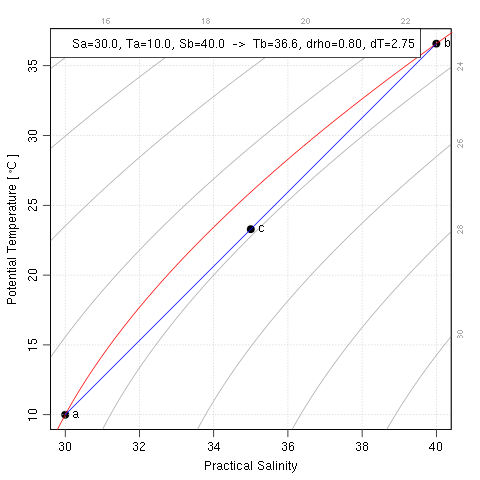

In [68]:
%%R
library(oce)
Sa <- 30; Ta <- 10; Sb <- 40; 
rho0 <- swRho(Sa, Ta, 0)
Tb <- uniroot(function(T) rho0-swRho(Sb,T,0), lower=0, upper=100)$root
Sc <- (Sa + Sb) /2; Tc <- (Ta + Tb) /2
drho <- swRho(Sc, Tc, 0) - rho0
dT <- drho / rho0 / swAlpha(Sc, Tc, 0)
plotTS(as.ctd(c(Sa, Sb, Sc), c(Ta, Tb, Tc), 0), pch=20, cex=2)
drawIsopycnals(levels=rho0, col="red", cex=0)
segments(Sa, Ta, Sb, Tb, col="blue")
text(Sb, Tb, "b", pos=4); text(Sa, Ta, "a", pos=4); text(Sc, Tc, "c", pos=4)
legend("topleft",legend=sprintf("Sa=%.1f, Ta=%.1f, Sb=%.1f  ->  Tb=%.1f, drho=%.2f, dT=%.2f",Sa, Ta, Sb, Tb, drho, dT),bg="white")

## Caveat: Just because I said this is good stuff it means you should use it

![](./images/questionable_taste.jpg)

##  Now we are ready to fix the World!

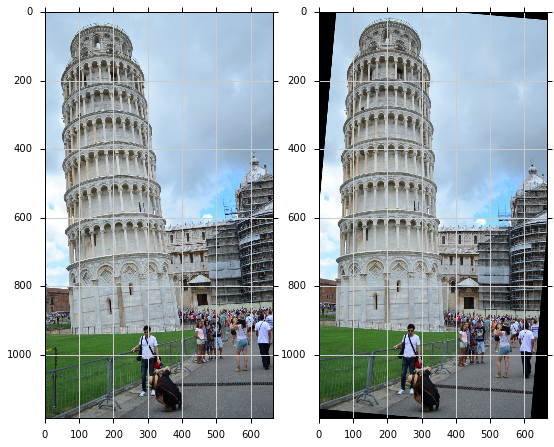

In [69]:
from skimage import io
from skimage.transform import rotate

img = io.imread('./images/dsc_0223.jpg')

rotated = rotate(img, -5, order=3)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 9))
ax0.imshow(img)
ax1.imshow(rotated);